Coeficiente R^2: 
- Quanto mais perto do 1 melhor; 
- Maneira de determinar a qualidade do modelo de regressão;
- Se der números negativos, certamente o modelo não está a funcionar bem; 
- Se der número entre 0 e 1, pode estar a funcionar bem ou não.

NOTAS: 
- .score() na classificação: prob. de acertos
- .score() na regressão: R^2 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.linalg as la


In [2]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab4/material_fornecido/RegressData001.p'

D = pickle.load(open(fN, 'rb'))

x = D['x']
y = D['y']

#plt.figure(figsize=(5,5))
#plt.plot(x.T, y.T, '.')

print(X.shape)

X = np.vstack((np.ones(x.shape[1]), x))

Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)

import scipy.linalg as la

w = np.dot(la.pinv(Rx), rxy)

# Desenhar a reta no meio dos pontos
xtmp = np.array([-5, 5])
ytmp = xtmp*w[1] + w[0]

plt.figure(figsize=(5,5))
plt.plot(x.T, y.T, '.')
plt.axis('scaled')
plt.plot(xtmp, ytmp, 'r')

ye = np.dot(w.T, X)

print(ye.shape)

plt.figure(figsize=(5,5))
plt.plot(x.T, (y - ye).T, '.')

my = np.mean(y)

erro = y-ye

St = np.sum((y-my)**2)
Sr = np.sum(erro**2)

print('Qualidade: ', 1-Sr/St)


NameError: name 'X' is not defined

[[ 1.11538364]
 [-0.91987301]]
Qualidade:  0.8001643397731499


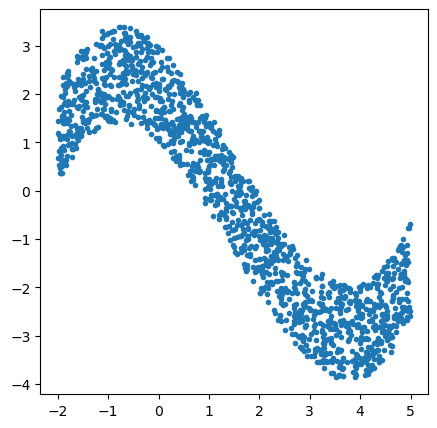

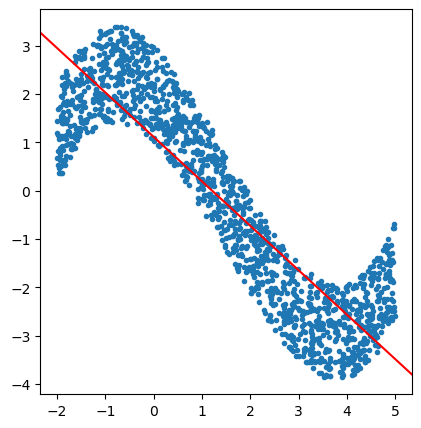

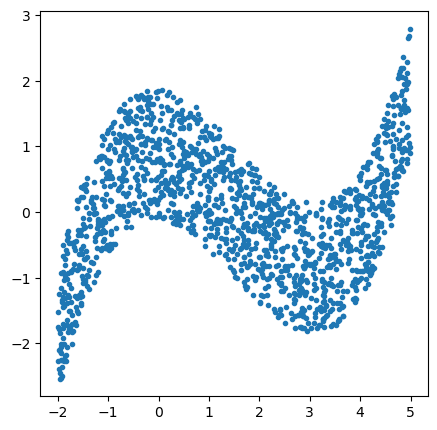

In [ ]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab4/material_fornecido/RegressData002.p'

D = pickle.load(open(fN, 'rb'))
x = D['x']
y = D['y']

plt.figure(figsize=(5,5))
plt.plot(x.T, y.T, '.')

X = np.vstack((np.ones(x.shape[1]), x))

Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)

w = np.dot(la.pinv(Rx), rxy)
print(w)

xtmp = np.array([-3, 6])
ytmp = xtmp*w[1] + w[0]

plt.figure(figsize=(5,5))
plt.plot(x.T, y.T, '.')
plt.axis('scaled')
plt.plot(xtmp, ytmp, 'r')

# Com uma reta não consigo obter aproximações à distribuição dos dados

ye = np.dot(w.T, X)

plt.figure(figsize=(5,5))
plt.plot(x.T, (y - ye).T, '.')

erro = y-ye

St = np.sum((y-my)**2)
Sr = np.sum(erro**2)

print('Qualidade: ', 1-Sr/St)


In [ ]:
my = np.mean(y)

erro = y-ye

St = np.sum((y-my)**2)
Sr = np.sum(erro**2)

print(1-Sr/St)

0.8001643397731499


#### Modelos Polinomiais

##### Modelo de terceira ordem
y_est = w0 + w1*x + w2*x^2 + w3*x^3

[[ 2.01160905]
 [-0.98245165]
 [-0.51315283]
 [ 0.11294984]]
Qualidade:  0.9255804391025634


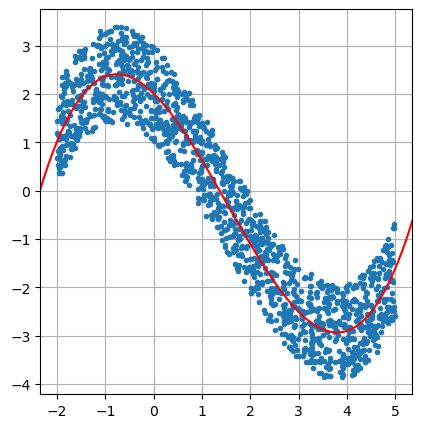

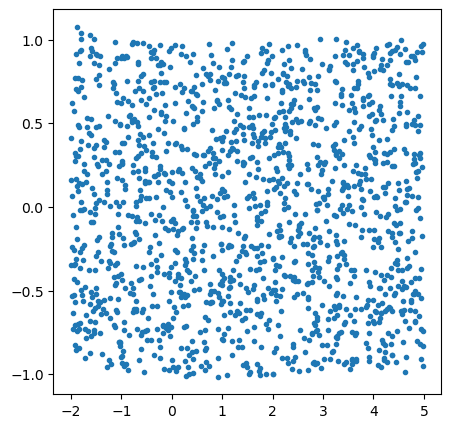

In [ ]:
X = np.vstack((np.ones(x.shape[1]), x, x**2, x**3))

Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)

w = np.dot(la.pinv(Rx), rxy)

print(w)

# Pontos equiespaçados da dimensão X dos meus dados
xtmp = np.linspace(-3, 6, 200)
ytmp = w[0] + w[1]*xtmp + w[2]*xtmp**2 + w[3]*xtmp**3

plt.figure(figsize=(5,5))
plt.plot(x.T, y.T, '.')
plt.axis('scaled')
plt.grid(True)
plt.plot(xtmp, ytmp, 'r')

ye = np.dot(w.T, X)


plt.figure(figsize=(5,5))
plt.plot(x.T, (y - ye).T, '.')

erro = y-ye

St = np.sum((y-my)**2)
Sr = np.sum(erro**2)

print('Qualidade: ', 1-Sr/St)



#### Problema de Regressão

In [ ]:
import sklearn.datasets as dt

D = dt.load_boston()

(506, 13)
(506,)
(14, 506)
[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224641e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
Qualidade:  0.9638122890257709


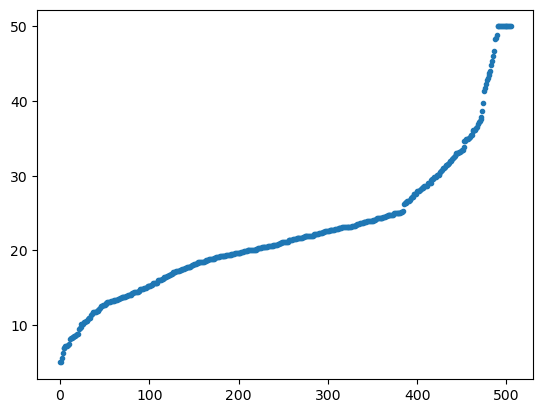

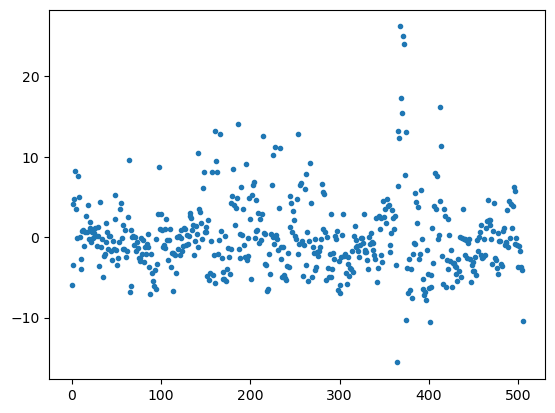

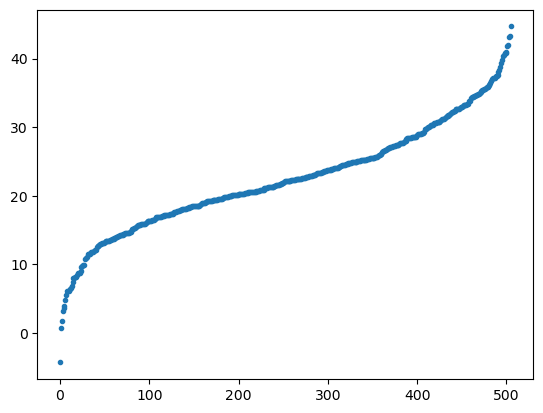

In [ ]:
y = D.target
X = D.data

print(X.shape)
print(y.shape)

plt.plot(np.sort(y), '.')

Xb = np.vstack((np.ones(506), X.T))
print(Xb.shape)

Rx = np.dot(Xb, Xb.T)
rxy = np.dot(Xb, y.T)

w = np.dot(la.pinv(Rx), rxy)

print(w)

ye = np.dot(w.T, Xb)

plt.figure()
plt.plot(y-ye, '.')

plt.figure()
plt.plot(np.sort(ye), '.')

erro = y-ye

St = np.sum((y-my)**2)
Sr = np.sum(erro**2)

print('Qualidade: ', 1-Sr/St)


(506, 13)
(337, 13)
(14, 337)
[ 3.34408343e+01 -1.29469552e-01  3.79597901e-02  6.09783935e-02
  3.21349778e+00 -1.64996136e+01  3.91151860e+00 -1.26019052e-02
 -1.42774164e+00  2.39545629e-01 -8.17982439e-03 -9.35991036e-01
  1.19478911e-02 -5.46562433e-01]
Score treino:  0.7389831456966496
Score teste:  0.7262099239984425


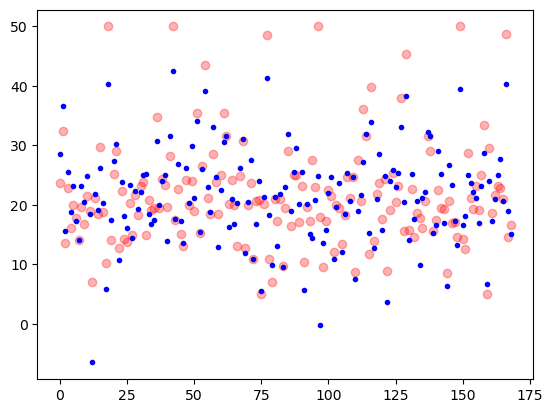

In [ ]:
# Divisão em treino e teste para ver se regressor está a funcionar bem 
from sklearn.model_selection import train_test_split

print(X.shape)

X1, X2, y1, y2 = train_test_split(X, y, train_size=2/3, random_state=42)
print(X1.shape)
# Achar os w com dados de treino
Xb = np.vstack((np.ones(X1.shape[0]), X1.T))
print(Xb.shape)
Rx = np.dot(Xb, Xb.T)
rxy = np.dot(Xb, y1.T)

w = np.dot(la.pinv(Rx), rxy)
print(w)

xtmp = np.array([-3, 6])
ytmp = xtmp*w[1] + w[0]

# Prever com dados de teste
ye = w[0] + w[1]*X2

#plt.figure(X2, y2-ye, '.')







# Treino com sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X1, y1)
w2 = lr.coef_ # Nos coeficientes o w0 está à parte, logo só tenho 13 w's
w0 = lr.intercept_

y2e = lr.predict(X2)

plt.figure()
plt.plot(y2, 'or', alpha=0.3)
plt.plot(y2e, '.b')

print("Score treino: ", lr.score(X1, y1))
print("Score teste: ", lr.score(X2, y2))

Score treino:  -1.5770389218094234
Score teste:  -4.902126898711801
Score treino:  1.0
Score teste:  -133.3669752051588


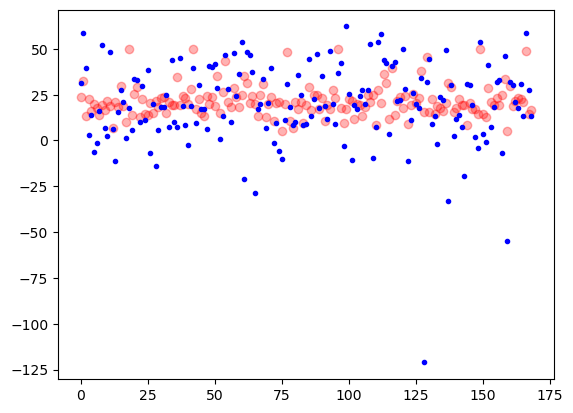

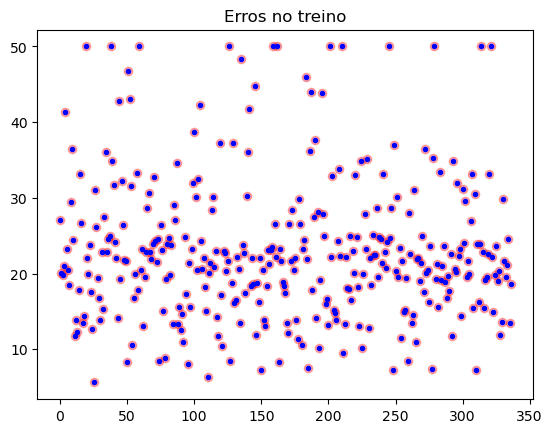

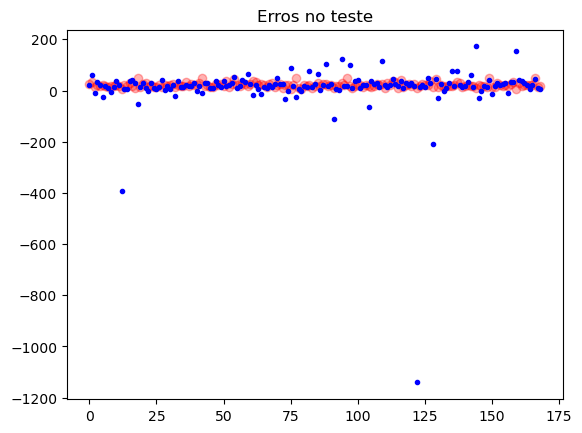

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 2 - ordem, neste caso ao quadrado
poly = PolynomialFeatures(2).fit(X1)
X1p = poly.transform(X1)
X2p = poly.transform(X2)

lr = LinearRegression().fit(X1p, y1)

print("Score treino: ", lr.score(X1p, y1))
print("Score teste: ", lr.score(X2p, y2))

y2e = lr.predict(X2p)

plt.figure()
plt.plot(y2, 'or', alpha=0.3)
plt.plot(y2e, '.b')



# 3 - ordem, neste caso ao quadrado
# Acerta tudo no treino mas erra consideravelment no teste
poly = PolynomialFeatures(3).fit(X1)
X1p = poly.transform(X1)
X2p = poly.transform(X2)

lr = LinearRegression().fit(X1p, y1)

print("Score treino: ", lr.score(X1p, y1))
print("Score teste: ", lr.score(X2p, y2))

y1e = lr.predict(X1p)
y2e = lr.predict(X2p)

plt.figure()
plt.title("Erros no treino")
plt.plot(y1, 'or', alpha=0.3)
plt.plot(y1e, '.b')

plt.figure()
plt.title("Erros no teste")
plt.plot(y2, 'or', alpha=0.3)
plt.plot(y2e, '.b')



Score treino:  0.8251861611087418
Score teste:  0.8285466143146071
Score treino:  0.8417352093104158
Score teste:  0.8278622265649884


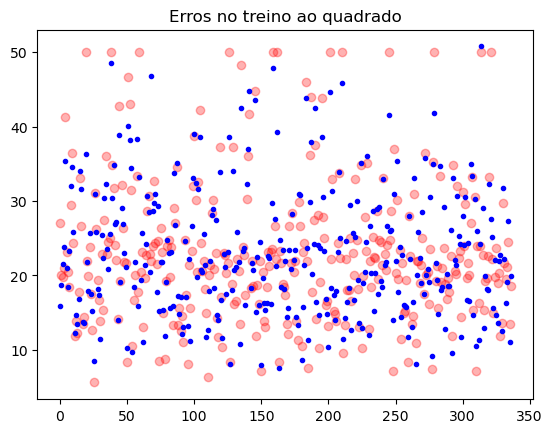

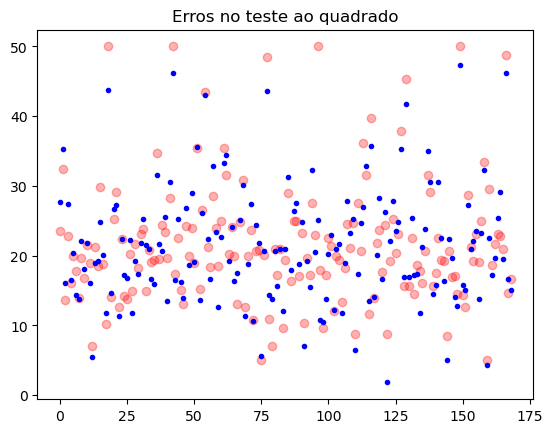

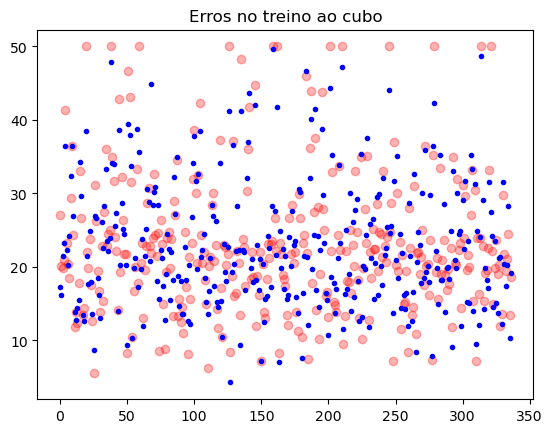

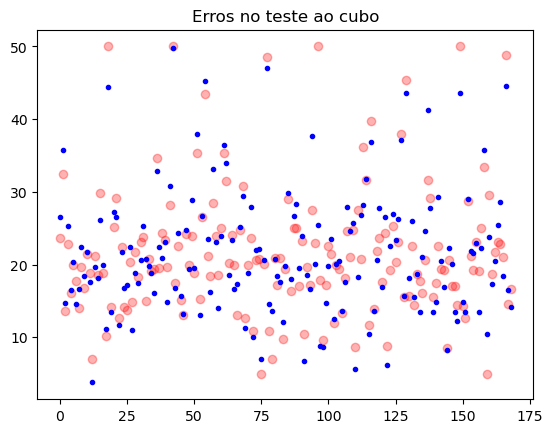

In [ ]:
# Ao quadrado mas manual
X1b = np.hstack((X1, X1**2))
X1b.shape

X2b = np.hstack((X2, X2**2))

lr = LinearRegression().fit(X1b, y1)

print("Score treino: ", lr.score(X1b, y1))
print("Score teste: ", lr.score(X2b, y2))

y1e = lr.predict(X1b)
y2e = lr.predict(X2b)


plt.figure()
plt.title("Erros no treino ao quadrado")
plt.plot(y1, 'or', alpha=0.3)
plt.plot(y1e, '.b')

plt.figure()
plt.title("Erros no teste ao quadrado")
plt.plot(y2, 'or', alpha=0.3)
plt.plot(y2e, '.b')




# Ao cubo mas manual
X1b = np.hstack((X1, X1**2, X1**3))
X1b.shape

X2b = np.hstack((X2, X2**2, X2**3))

lr = LinearRegression().fit(X1b, y1)

print("Score treino: ", lr.score(X1b, y1))
print("Score teste: ", lr.score(X2b, y2))

y1e = lr.predict(X1b)
y2e = lr.predict(X2b)


plt.figure()
plt.title("Erros no treino ao cubo")
plt.plot(y1, 'or', alpha=0.3)
plt.plot(y1e, '.b')

plt.figure()
plt.title("Erros no teste ao cubo")
plt.plot(y2, 'or', alpha=0.3)
plt.plot(y2e, '.b')


(337, 560)
Score treino (Ridge):  0.9750747010712247
Score teste (Ridge):  -19.063294631111884
Pesos a zero Ridge (podem cair):  1


c:\Users\anaso\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Score treino (Lasso):  0.9785774350251462
Score teste: (Lasso) -1.5598159889392291
Pesos a zero Lasso (podem cair):  310


c:\Users\anaso\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.201e+02, tolerance: 2.977e+00
  model = cd_fast.enet_coordinate_descent(


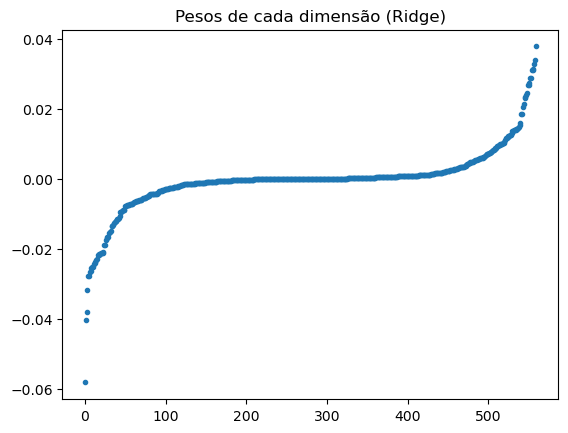

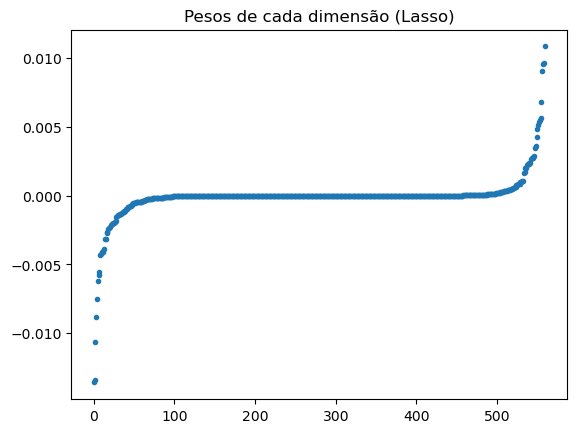

In [ ]:
# Com ridge (L2) e lasso (L1) com termos de terceira ordem
from sklearn.linear_model import LinearRegression, Ridge, Lasso

poly = PolynomialFeatures(3).fit(X1)
X1p = poly.transform(X1)
X2p = poly.transform(X2)

print(X1p.shape)

# Com Ridge
# Quanto maior o alpha mais regularização temos
lr = Ridge().fit(X1p, y1)
print("Score treino (Ridge): ", lr.score(X1p, y1))
print("Score teste (Ridge): ", lr.score(X2p, y2))

w = lr.coef_
print("Pesos a zero Ridge (podem cair): ", np.sum(w==0))

plt.figure()
plt.title("Pesos de cada dimensão (Ridge)")
plt.plot(np.sort(w), '.')

# Com Lasso
lr = Lasso(max_iter=100000).fit(X1p, y1)
print("Score treino (Lasso): ", lr.score(X1p, y1))
print("Score teste: (Lasso)", lr.score(X2p, y2))


w = lr.coef_
print("Pesos a zero Lasso (podem cair): ", np.sum(w==0))

plt.figure()
plt.title("Pesos de cada dimensão (Lasso)")
plt.plot(np.sort(w), '.')


(337, 105)
Score treino (Ridge):  0.9417314853302453
Score teste (Ridge):  0.6711733316426048
Pesos a zero Ridge (podem cair):  1
Score treino (Lasso):  0.8919829934231809
Score teste: (Lasso) 0.8368729798810249
Pesos a zero Lasso (podem cair):  52


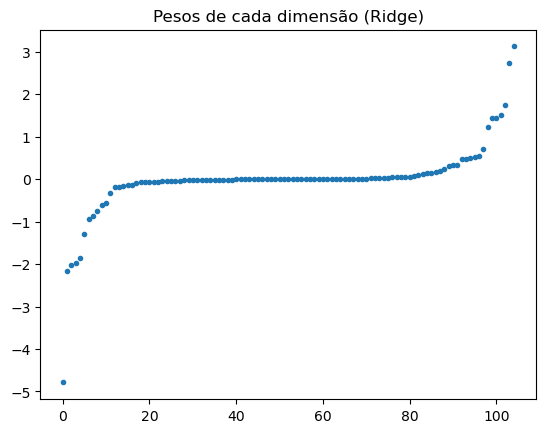

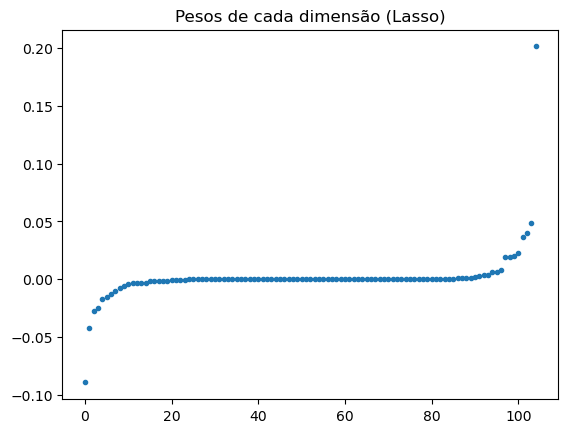

In [ ]:
# Com ridge (L2) e lasso (L1) com termos de segunda ordem
from sklearn.linear_model import LinearRegression, Ridge, Lasso

poly = PolynomialFeatures(2).fit(X1)
X1p = poly.transform(X1)
X2p = poly.transform(X2)

print(X1p.shape)

# Com Ridge
# Quanto maior o alpha mais regularização temos
lr = Ridge().fit(X1p, y1)
print("Score treino (Ridge): ", lr.score(X1p, y1))
print("Score teste (Ridge): ", lr.score(X2p, y2))

w = lr.coef_
print("Pesos a zero Ridge (podem cair): ", np.sum(w==0))

plt.figure()
plt.title("Pesos de cada dimensão (Ridge)")
plt.plot(np.sort(w), '.')

# Com Lasso
lr = Lasso(max_iter=100000).fit(X1p, y1)
print("Score treino (Lasso): ", lr.score(X1p, y1))
print("Score teste: (Lasso)", lr.score(X2p, y2))


w = lr.coef_
print("Pesos a zero Lasso (podem cair): ", np.sum(w==0))

plt.figure()
plt.title("Pesos de cada dimensão (Lasso)")
plt.plot(np.sort(w), '.')


(2000,)
[ 24  63  89 134 196 205 232 306 312 343 346 348 353 402 449 478 610 617
 705 719 848 941 985]


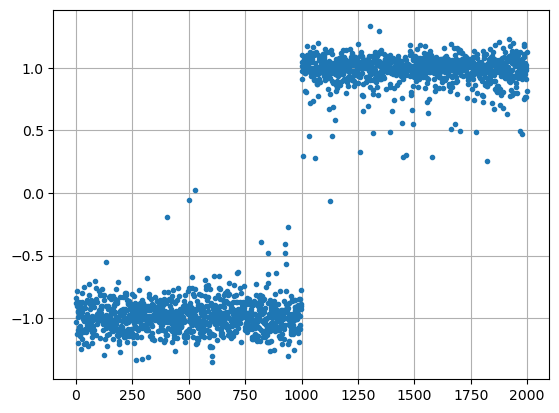

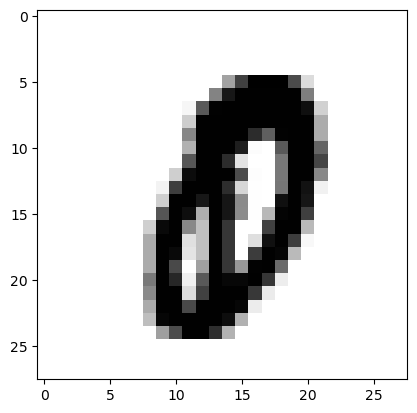

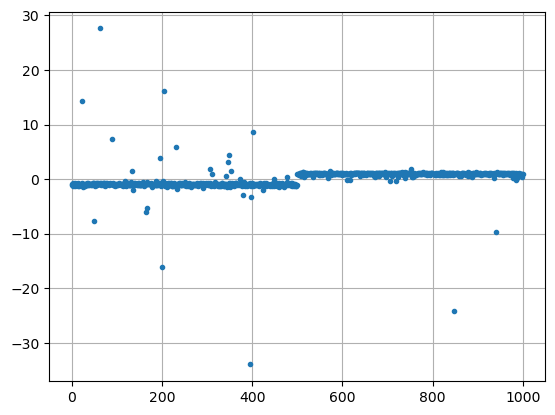

In [21]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab4/material_fornecido/MNISTsmall.p'

D = pickle.load(open(fN, 'rb'))

X = D['X']
y = D['trueClass']

f1 = D['foldTrain']
f2 = D['foldTest']

#treino
X1 = X[:,f1]
y1 = y[f1]

#teste
X2 = X[:,f2]
y2 = y[f2]

idx = (y1==0) | (y1==1)
X1 = X1[:, idx]

idx = (y2==0) | (y2==1)
X2 = X2[:, idx]

# Acrescento 1 linha de 1's para ter coordenada homegénea
X1b = np.vstack((np.ones(2000), X1))
X2b = np.vstack((np.ones(1000), X2))

Y1 = np.hstack((-np.ones(1000), np.ones(1000)))
y2b = np.hstack((np.zeros(500), np.ones(500)))

# Calculo Rx e rxy
Rx = np.dot(X1b, X1b.T)
rxy = np.dot(X1b, Y1)

# Calcular pesos: multiplico com Rx e inverto rxy
w = np.dot(la.pinv(Rx), rxy)

Y1e = np.dot(w.T, X1b)

print(Y1e.shape)

plt.figure()
plt.plot(Y1e, '.')
plt.grid(True)


# Encontrar erro nas primeiras 1000 amostras do sinal estimado
np.argwhere(Y1e[:1000]>0)
# Mostrar erro
plt.figure()
plt.imshow(X1[:, 527].reshape(28,28), cmap='binary')


# Para os dados de teste
Y2e =  np.dot(w.T, X2b)
y2e = (Y2e > 0)*1.0

erro = np.argwhere(y2e != y2b).squeeze()
print(erro)

plt.figure()
plt.plot(Y2e, '.')
plt.grid(True)


In [42]:
# Multi-classe
X1 = X[:, f1]
y1 = y[f1]
X2 = X[:, f2]
y2 = y[f2]

# Adicionar coordenadas homogéneas
X1b = np.vstack((np.ones(10000), X1))
X2b = np.vstack((np.ones(5000), X2))

print("X1b",X1b.shape)

# Preparar vetor Y
Y1 = -np.ones((10, 10000))

for i in np.arange(10):
    Y1[i, y1==i] = 1

Rx = np.dot(X1b, X1b.T)
rxy = np.dot(X1b, Y1.T)

print("Rx ", Rx.shape)
print("rxy ", rxy.shape)

w = np.dot(la.pinv(Rx), rxy)

print("w ", w.shape)

Y1e = np.dot(w.T, X1b)

print(Y1e.shape)

y1e = np.argmax(Y1e, axis=0)

erros = np.sum(y1e != y1)

print("Erros Treino", erros)

from sklearn.metrics import confusion_matrix

print(Y1.shape)
print(y1e.shape)

CM = confusion_matrix(y1, y1e)
print("Matriz de confusão do Treino", CM)



# Teste
Y2 = -np.ones((10, 5000))

for i in np.arange(10):
    Y1[i, y1==i] = 1

Y2e = np.dot(w.T, X2b)
y2e = np.argmax(Y2e, axis=0)

erros = np.sum(y2e != y2)

print("Erros Teste", erros)

CM = confusion_matrix(y2, y2e)
print("Matriz de confusão do Teste", CM)

X1b (785, 10000)
Rx  (785, 785)
rxy  (785, 10)
w  (785, 10)
(10, 10000)
Erros Treino 1173
(10, 10000)
(10000,)
Matriz de confusão do Treino [[972   1   3   4   2   4   8   0   5   1]
 [  1 971   6   1   4   5   0   0  10   2]
 [ 10  44 835  25  14   3  29   7  31   2]
 [  2  28  27 849   7  25   6  19  11  26]
 [  0  16   4   1 911   7   7   6   6  42]
 [ 23   8   2  58  14 811  25   5  38  16]
 [ 11   5  10   0   9  17 943   0   5   0]
 [  7  25   4   5  26   1   0 879   0  53]
 [ 14  65   8  22  15  28  17   4 801  26]
 [  9   9   5  15  39   2   0  58   8 855]]
Erros Teste 999
Matriz de confusão do Teste [[472   0   2   2   1   4   9   0   8   2]
 [  0 483   2   3   2   2   4   1   2   1]
 [  8  49 336  22   8   1  25  20  26   5]
 [  3  13  10 402   3  22   5  16  16  10]
 [  0   7   5   1 440   2   8   3   3  31]
 [ 20   9   3  40  21 337  11  13  30  16]
 [ 12  10  10   0  30  22 409   0   7   0]
 [  4  34   3   7  19   3   1 384   2  43]
 [ 11  32   9  21  23  18  11  10 353  12

(2, 1000)
Erros:  266


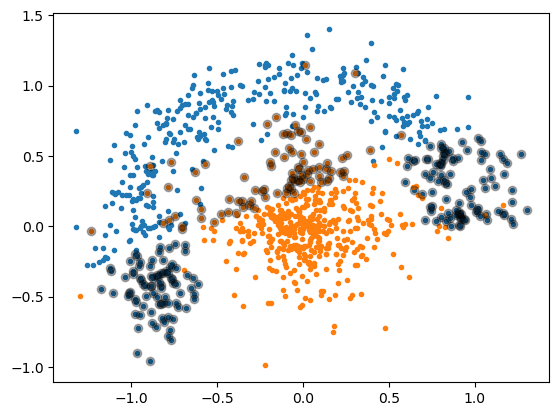

In [64]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab4/material_fornecido/QuadDiscData.p'

D = pickle.load(open(fN, 'rb'))

D.keys()

X = D['data']
y = D['target']

#print("Classes: ", np.unique(y))
#plt.plot(y)

print(X.shape) # Dados têm 2 dimensões


#plt.plot(X[0, y==0], X[1, y==0], '.')
#plt.plot(X[0, y==1], X[1, y==1], '.')
#plt.axis('scaled')
#plt.grid()


# Acrescentar coordenada homogenea
Xb = np.vstack((np.ones(1000), X))
# Calcular saidas
yb = 2*y-1

Rx = np.dot(Xb, Xb.T)
rxy = np.dot(yb, Xb.T)

w = np.dot(la.pinv(Rx), rxy)

ye = np.dot(w.T, Xb)

ye = (ye > 0)*1.

print("Erros: ", np.sum(ye != y))


plt.plot(X[0, y==0], X[1, y==0], '.')
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.3)



Erros:  45


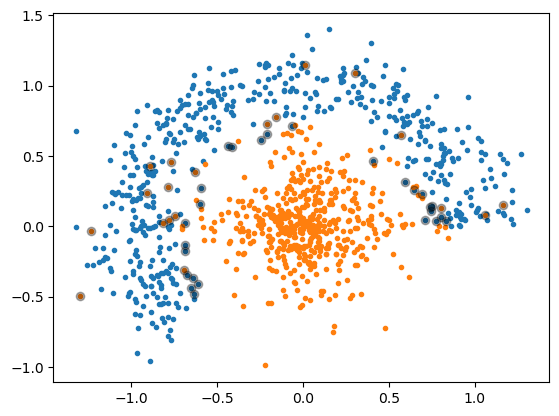

In [67]:
# Discriminante polinomial de segunda ordem 
Xb = np.vstack((np.ones(1000), X, X**2, X[0,:]*X[1,:]))
# Calcular saidas
yb = 2*y-1

Rx = np.dot(Xb, Xb.T)
rxy = np.dot(yb, Xb.T)

w = np.dot(la.pinv(Rx), rxy)

ye = np.dot(w.T, Xb)

ye = (ye > 0)*1.

print("Erros: ", np.sum(ye != y))

plt.plot(X[0, y==0], X[1, y==0], '.')
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.3)




In [86]:
from sklearn.datasets import load_iris

D = load_iris()

print(D.keys())

X = D['data']
y = D['target']

#print(X.shape)
#print("Classes: ", np.unique(y))
#plt.plot(y)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2).fit(X)
Xb = poly.transform(X)

print(Xb.shape) # dimensão 15 corresponde aos 15 w calculados


Y = -np.ones((3,150))

for i in range(3): 
    Y[i, y==i] = 1

Xb = Xb.T
Rx = np.dot(Xb, Xb.T)
rxy = np.dot(Xb, Y.T)

w = np.dot(la.pinv(Rx), rxy)

Ye = np.dot(w.T, Xb)

ye = np.argmax(Ye, axis=0)

print("Erros: ", np.sum(y!= ye))
print("Matriz de confisão", confusion_matrix(y, ye))



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 15)
Erros:  3
Matriz de confisão [[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]
